In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_datasets as tfds

In [6]:
df_eda = pd.DataFrame()

classes = []
train_image_number_breakdown = {}
test_image_number_breakdown = {}
number_test_images = 0
number_train_images = 0
for class_name in os.listdir("data/Train"):
    classes.append(class_name)
    path = os.path.join("data/Train",class_name)
    count = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))]) 
    train_image_number_breakdown[class_name] = count
    number_train_images += count


for class_name in os.listdir("data/Test"):
    classes.append(class_name)
    path = os.path.join("data/Test",class_name)
    count = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))]) 
    test_image_number_breakdown[class_name] = count
    number_test_images += count

classes = list(set(classes))

In [7]:
print("Number of Train Images {}".format(number_train_images))
print("Number of Test Images {}".format(number_test_images))
print("##"*25)
print("Train Images Breakdown {}".format(train_image_number_breakdown))
print("__"*25)
print("Test Images Breakdown {}".format(test_image_number_breakdown))
print("##"*25)
print("Classes {}".format(classes))

Number of Train Images 2239
Number of Test Images 118
##################################################
Train Images Breakdown {'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}
__________________________________________________
Test Images Breakdown {'actinic keratosis': 16, 'basal cell carcinoma': 16, 'dermatofibroma': 16, 'melanoma': 16, 'nevus': 16, 'pigmented benign keratosis': 16, 'seborrheic keratosis': 3, 'squamous cell carcinoma': 16, 'vascular lesion': 3}
##################################################
Classes ['actinic keratosis', 'seborrheic keratosis', 'basal cell carcinoma', 'pigmented benign keratosis', 'nevus', 'squamous cell carcinoma', 'melanoma', 'vascular lesion', 'dermatofibroma']


In [8]:
cant_tot = {}
for i in classes:
    cant_tot[i] = train_image_number_breakdown[i] + test_image_number_breakdown[i]
    print(i)

actinic keratosis
seborrheic keratosis
basal cell carcinoma
pigmented benign keratosis
nevus
squamous cell carcinoma
melanoma
vascular lesion
dermatofibroma


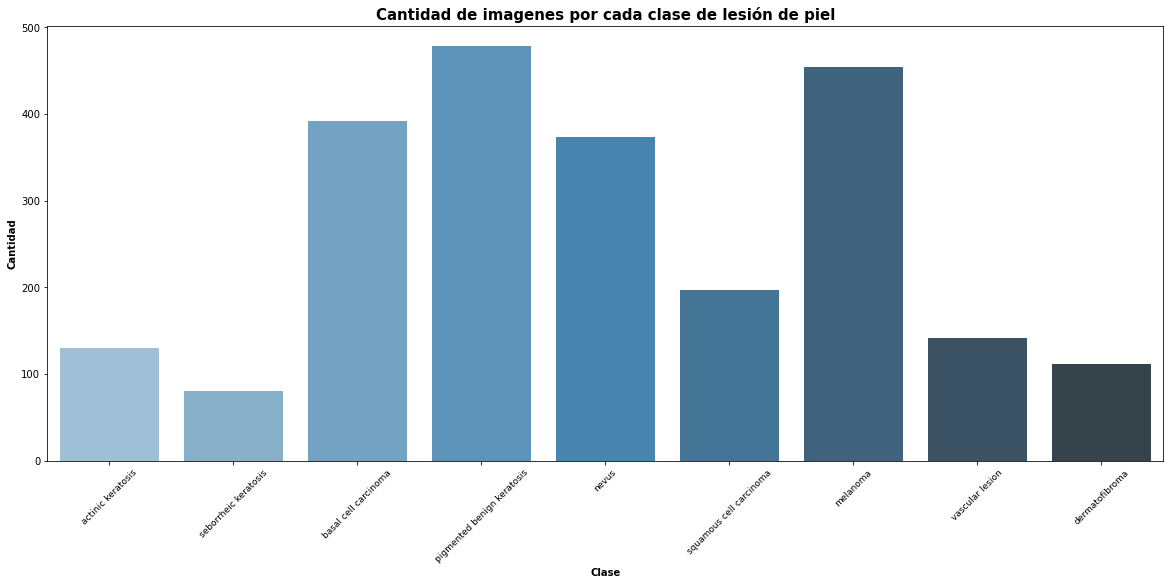

In [9]:
names = list(cant_tot.keys())
values = list(cant_tot.values())

plt.figure(figsize = (20, 8))
# plt.bar(range(len(cant_tot)), values, tick_label=names)
ax = sb.barplot(x=names, y=values, palette='Blues_d')
plt.xticks(fontsize=9, rotation=45)
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.title('Cantidad de imagenes por cada clase de lesión de piel', fontsize=15, fontweight='bold')
plt.savefig('Cantidad_fotos_por_tipo.png', bbox_inches='tight')
plt.show()

In [10]:
alto = 150
ancho = 150

# df_Train = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), label_mode = 'categorical', validation_split = 0.2, subset = 'training', batch_size=1) 
# df_Test = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), label_mode = 'categorical', validation_split = 0.2, subset = 'validation', batch_size=1) 

df_Train = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), validation_split = 0.2, subset = 'training', batch_size=1) 
df_Test = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), validation_split = 0.2, subset = 'validation', batch_size=1) 
#                                         seed = 123
#                                         image_size=(img_height, img_width), 
#                                         validation_split=0.2, 
#                                         subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
X_Train = []
y_Train = []

for image, label in tfds.as_numpy(df_Train):
#     print(type(image), type(label), label, len(label))
    X_Train.append(image.reshape(1, (150*150*3)))
    y_Train.append(label)

In [12]:
len(X_Train)

1792

In [13]:
X_Train_df = pd.DataFrame(np.concatenate(X_Train))

In [14]:
y_Train_df = pd.DataFrame(np.concatenate(y_Train))

In [15]:
X_Train_df.shape

(1792, 67500)

In [16]:
y_Train_df

,0
0,1
1,1
2,5
3,3
4,1
...,...
1787,1
1788,5
1789,0
1790,5


In [17]:
X_Train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,193.000000,151.00,152.5,190.500000,150.5000,150.5000,193.500000,147.00,148.500000,186.500000,...,149.000000,198.500000,143.000000,147.000000,179.500000,120.500000,114.500000,184.00000,124.000000,120.500000
1,203.500000,140.00,144.5,213.500000,157.5000,163.5000,211.500000,160.00,169.500000,216.500000,...,142.000000,214.000000,155.500000,141.500000,212.000000,149.500000,134.500000,213.50000,152.500000,141.500000
2,214.500000,175.00,176.5,208.500000,165.5000,165.5000,211.000000,168.50,168.000000,215.500000,...,181.500000,205.500000,175.500000,180.000000,203.500000,177.000000,180.000000,206.50000,174.500000,178.500000
3,18.860001,6.76,3.0,21.252399,7.9876,8.0248,27.380005,12.62,6.267338,28.922268,...,58.037689,62.203873,37.480648,30.204664,45.190342,24.015215,25.577955,38.23999,21.182508,15.335829
4,214.500000,161.50,153.5,217.000000,159.0000,155.0000,212.500000,159.50,151.500000,210.000000,...,137.500000,214.000000,162.500000,134.500000,213.000000,161.500000,136.000000,218.50000,168.000000,153.500000


In [18]:
# min(X_Train_df)
# max(X_Train_df)
print('Valor mínimo de los pixeles: ', min(X_Train_df.min()))
print('Valor máximo de los pixeles: ', max(X_Train_df.max()))

Valor mínimo de los pixeles:  0.0
Valor máximo de los pixeles:  255.0


In [20]:
X_Train_df = X_Train_df/255
X_Train_df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.002968,0.002322,0.002345,0.002930,0.002314,0.002314,0.002976,0.002261,0.002284,0.002868,...,0.002291,0.003053,0.002199,0.002261,0.002760,0.001853,0.001761,0.002830,0.001907,0.001853
1,0.003130,0.002153,0.002222,0.003283,0.002422,0.002514,0.003253,0.002461,0.002607,0.003329,...,0.002184,0.003291,0.002391,0.002176,0.003260,0.002299,0.002068,0.003283,0.002345,0.002176
2,0.003299,0.002691,0.002714,0.003206,0.002545,0.002545,0.003245,0.002591,0.002584,0.003314,...,0.002791,0.003160,0.002699,0.002768,0.003130,0.002722,0.002768,0.003176,0.002684,0.002745
3,0.000290,0.000104,0.000046,0.000327,0.000123,0.000123,0.000421,0.000194,0.000096,0.000445,...,0.000893,0.000957,0.000576,0.000465,0.000695,0.000369,0.000393,0.000588,0.000326,0.000236
4,0.003299,0.002484,0.002361,0.003337,0.002445,0.002384,0.003268,0.002453,0.002330,0.003230,...,0.002115,0.003291,0.002499,0.002068,0.003276,0.002484,0.002092,0.003360,0.002584,0.002361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.003068,0.002268,0.002537,0.003106,0.002276,0.002545,0.003045,0.002207,0.002476,0.003053,...,0.002591,0.003076,0.002176,0.002530,0.003091,0.002145,0.002445,0.003076,0.002215,0.002445
1788,0.003622,0.002207,0.002215,0.003645,0.002222,0.002168,0.003614,0.002268,0.002307,0.003583,...,0.001784,0.002953,0.001607,0.001584,0.003007,0.001615,0.001738,0.003007,0.001561,0.001669
1789,0.002945,0.002453,0.002468,0.002945,0.002461,0.002484,0.003022,0.002530,0.002607,0.003076,...,0.002115,0.002514,0.001938,0.002007,0.002507,0.001892,0.002045,0.002499,0.001884,0.002053
1790,0.000446,0.000231,0.000223,0.000377,0.000200,0.000200,0.000361,0.000208,0.000208,0.000392,...,0.000215,0.000423,0.000231,0.000177,0.000469,0.000238,0.000231,0.000469,0.000223,0.000223


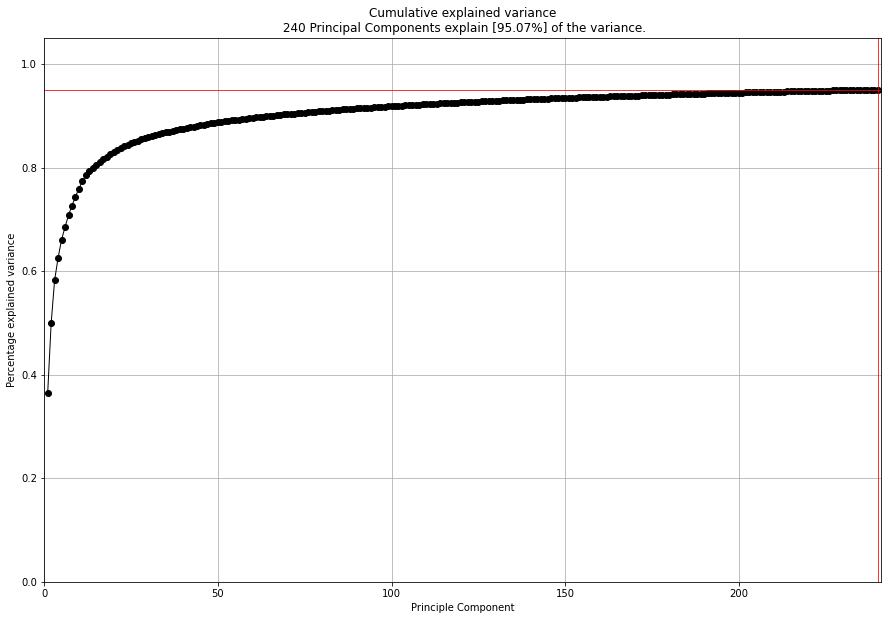

<Figure size 432x288 with 0 Axes>

In [21]:
from pca import pca
model = pca(240,normalize=True,verbose=True)
results = model.fit_transform(X_Train_df)

# Gráfica
fig, ax = model.plot()
fig.savefig('Varianza_explicada.png', bbox_inches='tight')

In [22]:
df_Train.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

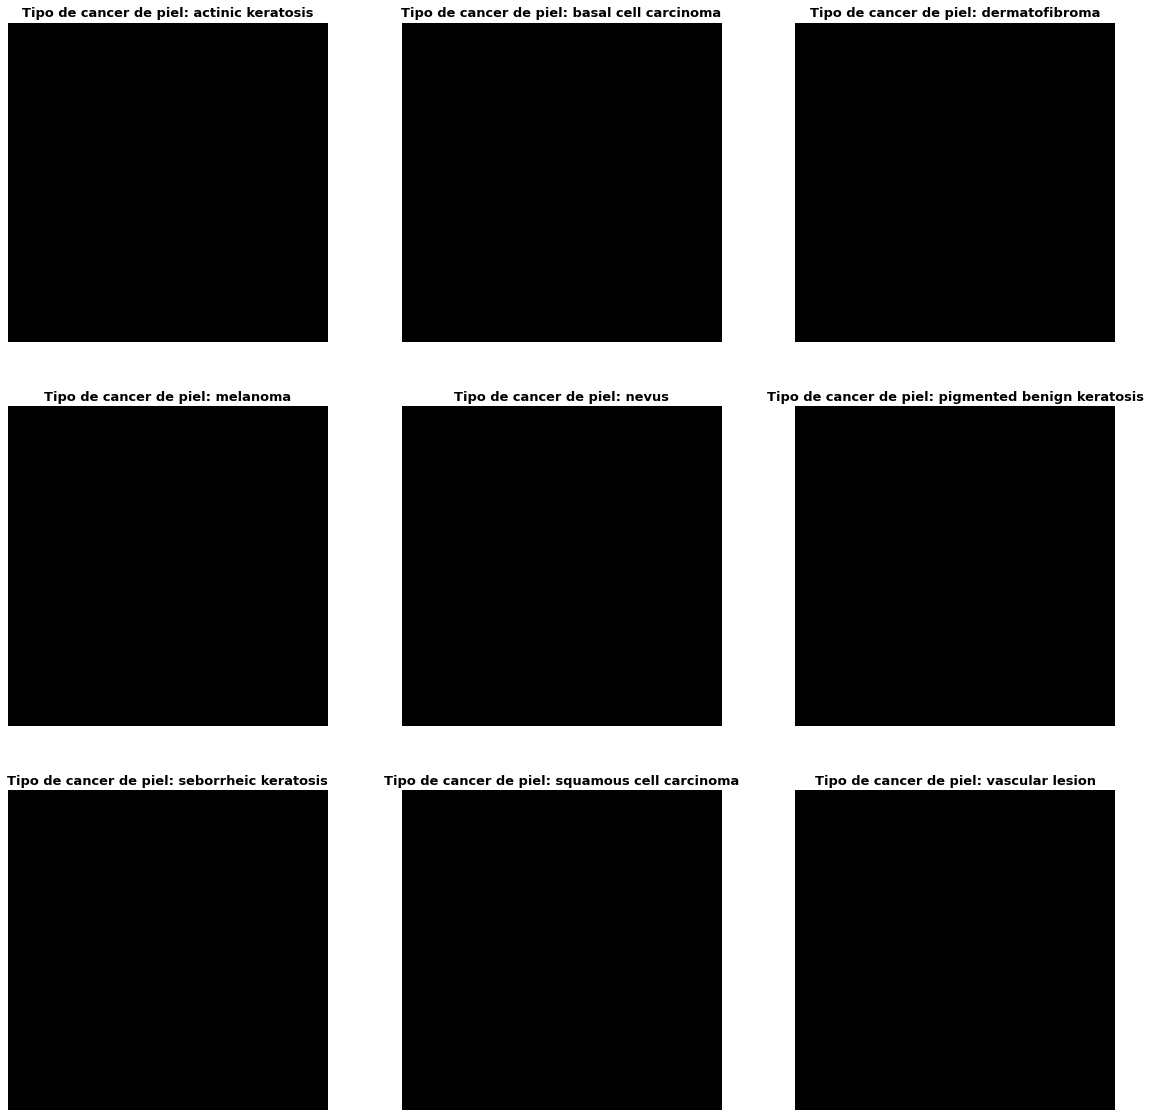

In [23]:
plt.figure(figsize=(20, 20))
for j in range(9):
    i = y_Train_df[y_Train_df[0]==j].head(1).index[0]
    plt.subplot(3, 3, j + 1)
    plt.imshow(np.array(X_Train_df.iloc[i]).reshape(150,150,3))
    tipo = df_Train.class_names[y_Train_df.iloc[i].values[0]]
    plt.title('Tipo de cancer de piel: ' + str(tipo), fontsize=13, fontweight='bold')
    plt.axis("off")
#     print(i)

plt.savefig('Ejemplo_fotos_por_tipo.png', bbox_inches='tight')
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

cluster_sk = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
cluster_sk =cluster_sk.fit_predict(PCA(n_components = 240).fit_transform(X_Train_df))

[Text(0.5, 66.80555555555556, 'Cluster'),
 Text(110.55555555555556, 0.5, 'Reales')]

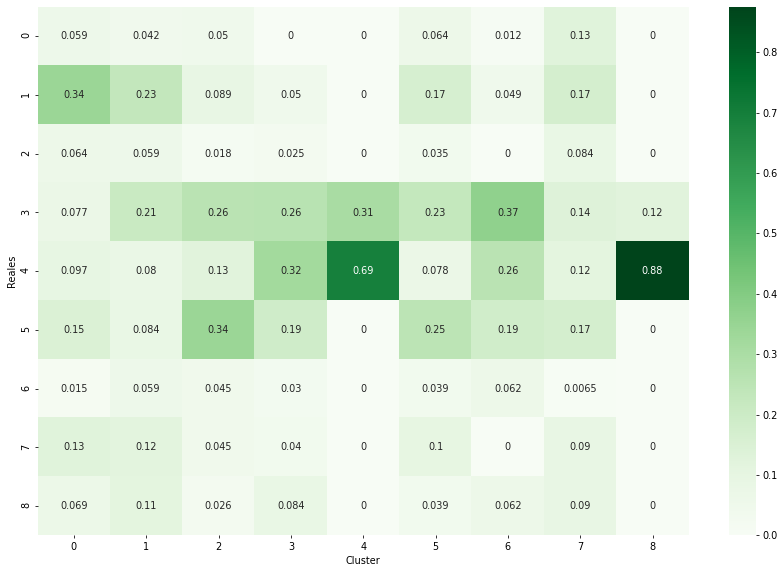

In [27]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_Train_df, cluster_sk)

fig = plt.figure(figsize = (15, 10), dpi = 70)
s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, cmap="Greens")
s.set(xlabel='Cluster', ylabel='Reales')